In [1]:
import time
import pandas as pd
import urllib.request
import requests
import bs4
from collections import Counter
import konlpy
from konlpy.tag import Hannanum
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
tagger=Hannanum()
check = ['경향신문','국민일보','동아일보','문화일보','서울신문','세계일보','조선일보','중앙일보','한겨레','한국일보','뉴스1','뉴시스','연합뉴스','채널A','한국경제TV','JTBC','KBS','MBC','MBN','SBS','TV조선','YTN','노컷뉴스','데일리안','미디어오늘','아이뉴스24','오마이뉴스','프레시안','디지털데일리','디지털타임스','블로터','전자신문','ZDNet Korea']
stopwords = ['단독','논란','구독','뉴스','채널','네이버','연합뉴스','금지','재배포','오후','오전','이후','이날','사진','콘텐츠','영상편집','영상취재','기자','만원','때문']

In [3]:
age = "age60"

In [4]:
folder1 = "C:/marketing4/" + age + "/" + age + "_1"
folder2 = "C:/marketing4/" + age + "/" + age + "_2"
folder3 = "C:/marketing4/" + age + "/" + age + "_3"
foldert = "C:/marketing4/" + age + "/" + age + "_t"

In [5]:
data = pd.read_excel(foldert + "/" + age + ".xlsx")
data

,날짜,실검
0,2021-03-04,82.44028
1,2021-03-05,100.00000
2,2021-03-06,50.67785
3,2021-03-07,40.41316
4,2021-03-08,46.80438
...,...,...
793,2023-05-06,3.09877
794,2023-05-07,1.93673
795,2023-05-08,2.51775
796,2023-05-09,4.19625


In [6]:
a2 = list(data['실검'])
b2 = []
c2 = []
for i, v in enumerate(a2):
    b2.append([v, i])
    if i % 7 == 6:
        c2.append(max(b2)[1])
        b2 = []
print(c2[:5])

[1, 8, 19, 21, 34]


In [7]:
df2 = data.loc[c2, :]
df2

,날짜,실검
1,2021-03-05,100.00000
8,2021-03-12,35.76500
19,2021-03-23,37.63718
21,2021-03-25,24.79018
34,2021-04-07,25.24209
...,...,...
763,2023-04-06,4.77727
776,2023-04-19,3.67979
777,2023-04-20,11.23305
786,2023-04-29,3.16333


In [8]:
df3 = df2.sort_values('실검', ascending = False, ignore_index = True)
df3

,날짜,실검
0,2021-03-05,100.00000
1,2021-05-05,52.42091
2,2021-10-25,37.95997
3,2021-03-23,37.63718
4,2021-03-12,35.76500
...,...,...
109,2022-10-20,3.80890
110,2022-08-21,3.74435
111,2023-04-19,3.67979
112,2022-09-21,3.29244


In [9]:
w = list(df3['실검'].apply(lambda x:x/100))
w[:10]

[1.0,
 0.5242091,
 0.3795997,
 0.37637180000000003,
 0.35765,
 0.29051,
 0.2524209,
 0.2479018,
 0.19561,
 0.1943189]

In [10]:
d = []
for i in range(len(df3)):
    d.append(str(df3.loc[i, '날짜'])[:10].replace("-",""))
d[:5]

['20210305', '20210505', '20211025', '20210323', '20210312']

In [11]:
e = []
for n, y in enumerate(d):
    e.append((n,y))
e[:10]

[(0, '20210305'),
 (1, '20210505'),
 (2, '20211025'),
 (3, '20210323'),
 (4, '20210312'),
 (5, '20221015'),
 (6, '20210407'),
 (7, '20210325'),
 (8, '20221030'),
 (9, '20210506')]

In [12]:
error = []
for n, y in e:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Date','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, y, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv(folder1 + '/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR1")
        error.append(1)
    else:
        print("Done")
        error.append(0)

n = 0 y = 20210305
ERROR1
n = 1 y = 20210505
Done
n = 2 y = 20211025
ERROR1
n = 3 y = 20210323
Done
n = 4 y = 20210312
Done
n = 5 y = 20221015
ERROR1
n = 6 y = 20210407
ERROR1
n = 7 y = 20210325
Done
n = 8 y = 20221030
Done
n = 9 y = 20210506
Done
n = 10 y = 20211005
Done
n = 11 y = 20210408
Done
n = 12 y = 20210417
Done
n = 13 y = 20220615
ERROR1
n = 14 y = 20210513
ERROR1
n = 15 y = 20210426
Done
n = 16 y = 20211226
Done
n = 17 y = 20210520
Done
n = 18 y = 20211123
Done
n = 19 y = 20210608
Done
n = 20 y = 20211105
Done
n = 21 y = 20210728
Done
n = 22 y = 20220116
Done
n = 23 y = 20220608
Done
n = 24 y = 20230420
Done
n = 25 y = 20210611
Done
n = 26 y = 20210802
Done
n = 27 y = 20220708
Done
n = 28 y = 20221230
Done
n = 29 y = 20211018
Done
n = 30 y = 20210530
Done
n = 31 y = 20220226
Done
n = 32 y = 20220314
ERROR1
n = 33 y = 20220208
Done
n = 34 y = 20211011
Done
n = 35 y = 20230129
Done
n = 36 y = 20220309
Done
n = 37 y = 20210618
Done
n = 38 y = 20210919
Done
n = 39 y = 20211214
D

In [13]:
retry = [e[i] for i in range(len(error)) if error[i] == 1]
print(len(retry))
print("="*25)
print(retry)

17
[(0, '20210305'), (2, '20211025'), (5, '20221015'), (6, '20210407'), (13, '20220615'), (14, '20210513'), (32, '20220314'), (50, '20230306'), (53, '20211216'), (57, '20220211'), (64, '20210817'), (70, '20220902'), (76, '20220223'), (78, '20221111'), (83, '20220401'), (92, '20220408'), (99, '20220421')]


In [14]:
error2 = []
for n, y in retry:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Date','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, y, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv(folder1 + '/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR1")
        error2.append(1)
    else:
        print("Done")
        error2.append(0)

n = 0 y = 20210305
Done
n = 2 y = 20211025
Done
n = 5 y = 20221015
Done
n = 6 y = 20210407
Done
n = 13 y = 20220615
Done
n = 14 y = 20210513
ERROR1
n = 32 y = 20220314
ERROR1
n = 50 y = 20230306
Done
n = 53 y = 20211216
Done
n = 57 y = 20220211
Done
n = 64 y = 20210817
Done
n = 70 y = 20220902
Done
n = 76 y = 20220223
ERROR1
n = 78 y = 20221111
Done
n = 83 y = 20220401
Done
n = 92 y = 20220408
Done
n = 99 y = 20220421
Done


In [15]:
retry2 = [retry[i] for i in range(len(error2)) if error2[i] == 1]
print(len(retry2))
print("="*25)
print(retry2)

3
[(14, '20210513'), (32, '20220314'), (76, '20220223')]


In [16]:
error3 = []
for n, y in retry2:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(1)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Date','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, y, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv(folder1 + '/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR1")
        error3.append(1)
    else:
        print("Done")
        error3.append(0)

n = 14 y = 20210513
Done
n = 32 y = 20220314
Done
n = 76 y = 20220223
Done


In [17]:
retry3 = [retry2[i] for i in range(len(error3)) if error3[i] == 1]
print(len(retry3))
print("="*25)
print(retry3)

0
[]


In [18]:
url = []
date = []
total = 0
for i in range(len(e)):
    news = pd.read_csv(folder1 + '/df' + str(i) + ".csv", encoding="utf-8-sig")
    date.extend(news["Date"])
    url.extend(news["URL"])
    total += len(news["URL"])

In [19]:
print(total)
print(len(date))
print(len(url))

18765
18765
18765


In [20]:
print(date[:5])
print("=" * 30)
print(url[:2])
print("=" * 30)

[20210305, 20210305, 20210305, 20210305, 20210305]
['https://n.news.naver.com/article/469/0000585613?ntype=RANKING', 'https://n.news.naver.com/article/469/0000585486?ntype=RANKING']


In [21]:
news_url = []
for n, y in enumerate(url):
    news_url.append((n,y))
num = len(news_url)
print(num)

18765


In [22]:
news_url[:2]

[(0, 'https://n.news.naver.com/article/469/0000585613?ntype=RANKING'),
 (1, 'https://n.news.naver.com/article/469/0000585486?ntype=RANKING')]

In [23]:
con_error = []
con = []

In [24]:
for idx, u in news_url:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    try:
        html = requests.get(u, headers = headers, timeout = 5)
    except:
        print("TimeOut ERROR")
        con.append([idx, " "])
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        con_error.append((idx, 3))
        time.sleep(300)
    else:
        time.sleep(1)
        bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
        body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
        if body != None:
            contents = body.text.replace('\n','')
            if len(contents) == 0:
                print("ERROR2")
                title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
                con.append([idx, title.text])
                df = pd.DataFrame(con, columns = ["idx",'Contents'])
                df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
                con_error.append((idx, 2))
                continue
            else: con.append([idx, contents])
        else:
            print("ERROR1")
            con.append([idx, " "])
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            con_error.append((idx, 1))
            continue
        if idx >= num-5:
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        print("Done")
        con_error.append((idx, 0))

idx = 0
Done
idx = 1
Done
idx = 2
Done
idx = 3
Done
idx = 4
Done
idx = 5
Done
idx = 6
Done
idx = 7
Done
idx = 8
Done
idx = 9
Done
idx = 10
Done
idx = 11
Done
idx = 12
Done
idx = 13
Done
idx = 14
Done
idx = 15
Done
idx = 16
Done
idx = 17
Done
idx = 18
Done
idx = 19
Done
idx = 20
Done
idx = 21
Done
idx = 22
Done
idx = 23
Done
idx = 24
Done
idx = 25
Done
idx = 26
Done
idx = 27
Done
idx = 28
Done
idx = 29
Done
idx = 30
Done
idx = 31
Done
idx = 32
Done
idx = 33
Done
idx = 34
Done
idx = 35
Done
idx = 36
Done
idx = 37
Done
idx = 38
Done
idx = 39
Done
idx = 40
Done
idx = 41
Done
idx = 42
Done
idx = 43
Done
idx = 44
Done
idx = 45
Done
idx = 46
Done
idx = 47
Done
idx = 48
Done
idx = 49
Done
idx = 50
Done
idx = 51
Done
idx = 52
Done
idx = 53
Done
idx = 54
Done
idx = 55
Done
idx = 56
Done
idx = 57
Done
idx = 58
Done
idx = 59
Done
idx = 60
Done
idx = 61
Done
idx = 62
Done
idx = 63
Done
idx = 64
Done
idx = 65
Done
idx = 66
Done
idx = 67
Done
idx = 68
Done
idx = 69
Done
idx = 70
Done
idx = 71
Done
id

Done
idx = 554
Done
idx = 555
Done
idx = 556
Done
idx = 557
Done
idx = 558
Done
idx = 559
Done
idx = 560
Done
idx = 561
Done
idx = 562
Done
idx = 563
Done
idx = 564
Done
idx = 565
Done
idx = 566
Done
idx = 567
Done
idx = 568
Done
idx = 569
Done
idx = 570
Done
idx = 571
Done
idx = 572
Done
idx = 573
Done
idx = 574
Done
idx = 575
Done
idx = 576
Done
idx = 577
Done
idx = 578
Done
idx = 579
Done
idx = 580
ERROR1
idx = 581
Done
idx = 582
Done
idx = 583
Done
idx = 584
Done
idx = 585
Done
idx = 586
Done
idx = 587
Done
idx = 588
Done
idx = 589
Done
idx = 590
Done
idx = 591
Done
idx = 592
Done
idx = 593
Done
idx = 594
Done
idx = 595
Done
idx = 596
ERROR1
idx = 597
Done
idx = 598
Done
idx = 599
Done
idx = 600
Done
idx = 601
Done
idx = 602
Done
idx = 603
Done
idx = 604
Done
idx = 605
Done
idx = 606
Done
idx = 607
Done
idx = 608
Done
idx = 609
Done
idx = 610
Done
idx = 611
Done
idx = 612
Done
idx = 613
Done
idx = 614
Done
idx = 615
Done
idx = 616
Done
idx = 617
Done
idx = 618
Done
idx = 619
Done
i

Done
idx = 1094
Done
idx = 1095
Done
idx = 1096
Done
idx = 1097
Done
idx = 1098
Done
idx = 1099
Done
idx = 1100
Done
idx = 1101
Done
idx = 1102
Done
idx = 1103
Done
idx = 1104
Done
idx = 1105
Done
idx = 1106
Done
idx = 1107
Done
idx = 1108
Done
idx = 1109
Done
idx = 1110
Done
idx = 1111
Done
idx = 1112
Done
idx = 1113
Done
idx = 1114
Done
idx = 1115
Done
idx = 1116
Done
idx = 1117
Done
idx = 1118
Done
idx = 1119
Done
idx = 1120
Done
idx = 1121
Done
idx = 1122
Done
idx = 1123
Done
idx = 1124
Done
idx = 1125
Done
idx = 1126
Done
idx = 1127
Done
idx = 1128
Done
idx = 1129
Done
idx = 1130
Done
idx = 1131
Done
idx = 1132
Done
idx = 1133
Done
idx = 1134
Done
idx = 1135
Done
idx = 1136
Done
idx = 1137
Done
idx = 1138
Done
idx = 1139
Done
idx = 1140
TimeOut ERROR
idx = 1141
Done
idx = 1142
Done
idx = 1143
Done
idx = 1144
Done
idx = 1145
Done
idx = 1146
Done
idx = 1147
Done
idx = 1148
Done
idx = 1149
Done
idx = 1150
Done
idx = 1151
Done
idx = 1152
Done
idx = 1153
Done
idx = 1154
Done
idx = 1155

Done
idx = 1606
Done
idx = 1607
Done
idx = 1608
Done
idx = 1609
Done
idx = 1610
Done
idx = 1611
Done
idx = 1612
Done
idx = 1613
Done
idx = 1614
Done
idx = 1615
Done
idx = 1616
Done
idx = 1617
Done
idx = 1618
Done
idx = 1619
Done
idx = 1620
Done
idx = 1621
Done
idx = 1622
Done
idx = 1623
Done
idx = 1624
Done
idx = 1625
Done
idx = 1626
Done
idx = 1627
Done
idx = 1628
Done
idx = 1629
Done
idx = 1630
Done
idx = 1631
Done
idx = 1632
Done
idx = 1633
Done
idx = 1634
Done
idx = 1635
Done
idx = 1636
Done
idx = 1637
Done
idx = 1638
Done
idx = 1639
Done
idx = 1640
Done
idx = 1641
Done
idx = 1642
Done
idx = 1643
Done
idx = 1644
Done
idx = 1645
Done
idx = 1646
Done
idx = 1647
Done
idx = 1648
Done
idx = 1649
Done
idx = 1650
Done
idx = 1651
Done
idx = 1652
Done
idx = 1653
Done
idx = 1654
Done
idx = 1655
Done
idx = 1656
Done
idx = 1657
Done
idx = 1658
Done
idx = 1659
Done
idx = 1660
Done
idx = 1661
Done
idx = 1662
Done
idx = 1663
Done
idx = 1664
Done
idx = 1665
Done
idx = 1666
Done
idx = 1667
Done
idx

Done
idx = 2119
Done
idx = 2120
Done
idx = 2121
Done
idx = 2122
Done
idx = 2123
Done
idx = 2124
Done
idx = 2125
Done
idx = 2126
Done
idx = 2127
Done
idx = 2128
Done
idx = 2129
Done
idx = 2130
Done
idx = 2131
Done
idx = 2132
Done
idx = 2133
Done
idx = 2134
Done
idx = 2135
Done
idx = 2136
Done
idx = 2137
Done
idx = 2138
Done
idx = 2139
Done
idx = 2140
Done
idx = 2141
Done
idx = 2142
Done
idx = 2143
Done
idx = 2144
Done
idx = 2145
Done
idx = 2146
Done
idx = 2147
Done
idx = 2148
Done
idx = 2149
Done
idx = 2150
Done
idx = 2151
Done
idx = 2152
Done
idx = 2153
Done
idx = 2154
Done
idx = 2155
Done
idx = 2156
Done
idx = 2157
Done
idx = 2158
Done
idx = 2159
Done
idx = 2160
Done
idx = 2161
Done
idx = 2162
Done
idx = 2163
Done
idx = 2164
Done
idx = 2165
Done
idx = 2166
Done
idx = 2167
Done
idx = 2168
Done
idx = 2169
Done
idx = 2170
Done
idx = 2171
Done
idx = 2172
Done
idx = 2173
Done
idx = 2174
Done
idx = 2175
Done
idx = 2176
Done
idx = 2177
Done
idx = 2178
Done
idx = 2179
Done
idx = 2180
Done
idx

Done
idx = 2631
Done
idx = 2632
Done
idx = 2633
Done
idx = 2634
Done
idx = 2635
Done
idx = 2636
Done
idx = 2637
Done
idx = 2638
Done
idx = 2639
Done
idx = 2640
Done
idx = 2641
Done
idx = 2642
Done
idx = 2643
Done
idx = 2644
Done
idx = 2645
Done
idx = 2646
Done
idx = 2647
Done
idx = 2648
Done
idx = 2649
Done
idx = 2650
Done
idx = 2651
Done
idx = 2652
Done
idx = 2653
Done
idx = 2654
Done
idx = 2655
Done
idx = 2656
Done
idx = 2657
Done
idx = 2658
Done
idx = 2659
Done
idx = 2660
Done
idx = 2661
Done
idx = 2662
Done
idx = 2663
Done
idx = 2664
Done
idx = 2665
Done
idx = 2666
Done
idx = 2667
Done
idx = 2668
Done
idx = 2669
Done
idx = 2670
Done
idx = 2671
Done
idx = 2672
Done
idx = 2673
Done
idx = 2674
Done
idx = 2675
Done
idx = 2676
Done
idx = 2677
Done
idx = 2678
Done
idx = 2679
Done
idx = 2680
Done
idx = 2681
Done
idx = 2682
Done
idx = 2683
Done
idx = 2684
Done
idx = 2685
Done
idx = 2686
Done
idx = 2687
Done
idx = 2688
Done
idx = 2689
Done
idx = 2690
Done
idx = 2691
Done
idx = 2692
Done
idx

Done
idx = 3144
Done
idx = 3145
Done
idx = 3146
Done
idx = 3147
Done
idx = 3148
Done
idx = 3149
Done
idx = 3150
Done
idx = 3151
Done
idx = 3152
Done
idx = 3153
Done
idx = 3154
Done
idx = 3155
Done
idx = 3156
Done
idx = 3157
Done
idx = 3158
Done
idx = 3159
Done
idx = 3160
Done
idx = 3161
Done
idx = 3162
Done
idx = 3163
Done
idx = 3164
Done
idx = 3165
Done
idx = 3166
Done
idx = 3167
Done
idx = 3168
Done
idx = 3169
Done
idx = 3170
Done
idx = 3171
Done
idx = 3172
Done
idx = 3173
Done
idx = 3174
Done
idx = 3175
Done
idx = 3176
Done
idx = 3177
Done
idx = 3178
Done
idx = 3179
Done
idx = 3180
Done
idx = 3181
Done
idx = 3182
Done
idx = 3183
Done
idx = 3184
Done
idx = 3185
Done
idx = 3186
Done
idx = 3187
Done
idx = 3188
Done
idx = 3189
Done
idx = 3190
Done
idx = 3191
Done
idx = 3192
Done
idx = 3193
Done
idx = 3194
Done
idx = 3195
Done
idx = 3196
Done
idx = 3197
Done
idx = 3198
Done
idx = 3199
Done
idx = 3200
Done
idx = 3201
Done
idx = 3202
Done
idx = 3203
Done
idx = 3204
Done
idx = 3205
Done
idx

Done
idx = 3657
Done
idx = 3658
Done
idx = 3659
Done
idx = 3660
Done
idx = 3661
Done
idx = 3662
Done
idx = 3663
Done
idx = 3664
Done
idx = 3665
Done
idx = 3666
Done
idx = 3667
Done
idx = 3668
Done
idx = 3669
Done
idx = 3670
Done
idx = 3671
Done
idx = 3672
Done
idx = 3673
Done
idx = 3674
Done
idx = 3675
Done
idx = 3676
Done
idx = 3677
Done
idx = 3678
Done
idx = 3679
Done
idx = 3680
Done
idx = 3681
Done
idx = 3682
Done
idx = 3683
Done
idx = 3684
Done
idx = 3685
Done
idx = 3686
Done
idx = 3687
Done
idx = 3688
Done
idx = 3689
Done
idx = 3690
Done
idx = 3691
Done
idx = 3692
Done
idx = 3693
Done
idx = 3694
Done
idx = 3695
Done
idx = 3696
Done
idx = 3697
Done
idx = 3698
Done
idx = 3699
Done
idx = 3700
Done
idx = 3701
Done
idx = 3702
Done
idx = 3703
Done
idx = 3704
Done
idx = 3705
Done
idx = 3706
Done
idx = 3707
Done
idx = 3708
Done
idx = 3709
Done
idx = 3710
Done
idx = 3711
Done
idx = 3712
Done
idx = 3713
Done
idx = 3714
Done
idx = 3715
Done
idx = 3716
Done
idx = 3717
Done
idx = 3718
Done
idx

Done
idx = 4169
Done
idx = 4170
Done
idx = 4171
Done
idx = 4172
Done
idx = 4173
Done
idx = 4174
Done
idx = 4175
Done
idx = 4176
Done
idx = 4177
Done
idx = 4178
Done
idx = 4179
Done
idx = 4180
Done
idx = 4181
Done
idx = 4182
Done
idx = 4183
Done
idx = 4184
Done
idx = 4185
Done
idx = 4186
Done
idx = 4187
Done
idx = 4188
Done
idx = 4189
Done
idx = 4190
Done
idx = 4191
Done
idx = 4192
Done
idx = 4193
Done
idx = 4194
Done
idx = 4195
Done
idx = 4196
Done
idx = 4197
Done
idx = 4198
Done
idx = 4199
Done
idx = 4200
Done
idx = 4201
Done
idx = 4202
Done
idx = 4203
Done
idx = 4204
Done
idx = 4205
Done
idx = 4206
Done
idx = 4207
Done
idx = 4208
Done
idx = 4209
Done
idx = 4210
Done
idx = 4211
Done
idx = 4212
Done
idx = 4213
Done
idx = 4214
Done
idx = 4215
Done
idx = 4216
Done
idx = 4217
Done
idx = 4218
Done
idx = 4219
Done
idx = 4220
Done
idx = 4221
Done
idx = 4222
Done
idx = 4223
Done
idx = 4224
Done
idx = 4225
ERROR1
idx = 4226
Done
idx = 4227
Done
idx = 4228
Done
idx = 4229
Done
idx = 4230
Done
i

Done
idx = 4681
Done
idx = 4682
Done
idx = 4683
Done
idx = 4684
Done
idx = 4685
Done
idx = 4686
Done
idx = 4687
Done
idx = 4688
Done
idx = 4689
Done
idx = 4690
Done
idx = 4691
Done
idx = 4692
Done
idx = 4693
Done
idx = 4694
Done
idx = 4695
Done
idx = 4696
Done
idx = 4697
Done
idx = 4698
Done
idx = 4699
Done
idx = 4700
Done
idx = 4701
Done
idx = 4702
Done
idx = 4703
Done
idx = 4704
Done
idx = 4705
Done
idx = 4706
Done
idx = 4707
Done
idx = 4708
Done
idx = 4709
Done
idx = 4710
Done
idx = 4711
Done
idx = 4712
Done
idx = 4713
Done
idx = 4714
Done
idx = 4715
Done
idx = 4716
Done
idx = 4717
Done
idx = 4718
Done
idx = 4719
Done
idx = 4720
Done
idx = 4721
Done
idx = 4722
Done
idx = 4723
Done
idx = 4724
Done
idx = 4725
Done
idx = 4726
Done
idx = 4727
Done
idx = 4728
Done
idx = 4729
Done
idx = 4730
Done
idx = 4731
Done
idx = 4732
Done
idx = 4733
Done
idx = 4734
Done
idx = 4735
Done
idx = 4736
Done
idx = 4737
Done
idx = 4738
Done
idx = 4739
Done
idx = 4740
Done
idx = 4741
Done
idx = 4742
Done
idx

Done
idx = 5193
Done
idx = 5194
Done
idx = 5195
Done
idx = 5196
Done
idx = 5197
Done
idx = 5198
Done
idx = 5199
Done
idx = 5200
Done
idx = 5201
Done
idx = 5202
Done
idx = 5203
Done
idx = 5204
Done
idx = 5205
Done
idx = 5206
Done
idx = 5207
Done
idx = 5208
Done
idx = 5209
Done
idx = 5210
Done
idx = 5211
Done
idx = 5212
Done
idx = 5213
Done
idx = 5214
Done
idx = 5215
Done
idx = 5216
Done
idx = 5217
Done
idx = 5218
Done
idx = 5219
Done
idx = 5220
Done
idx = 5221
Done
idx = 5222
Done
idx = 5223
Done
idx = 5224
Done
idx = 5225
Done
idx = 5226
Done
idx = 5227
Done
idx = 5228
Done
idx = 5229
Done
idx = 5230
Done
idx = 5231
Done
idx = 5232
Done
idx = 5233
Done
idx = 5234
Done
idx = 5235
Done
idx = 5236
Done
idx = 5237
Done
idx = 5238
Done
idx = 5239
Done
idx = 5240
Done
idx = 5241
Done
idx = 5242
Done
idx = 5243
Done
idx = 5244
Done
idx = 5245
Done
idx = 5246
Done
idx = 5247
Done
idx = 5248
Done
idx = 5249
Done
idx = 5250
Done
idx = 5251
Done
idx = 5252
Done
idx = 5253
Done
idx = 5254
Done
idx

Done
idx = 5705
Done
idx = 5706
Done
idx = 5707
Done
idx = 5708
Done
idx = 5709
Done
idx = 5710
Done
idx = 5711
Done
idx = 5712
Done
idx = 5713
Done
idx = 5714
Done
idx = 5715
Done
idx = 5716
Done
idx = 5717
Done
idx = 5718
Done
idx = 5719
Done
idx = 5720
Done
idx = 5721
Done
idx = 5722
Done
idx = 5723
Done
idx = 5724
Done
idx = 5725
Done
idx = 5726
Done
idx = 5727
Done
idx = 5728
Done
idx = 5729
Done
idx = 5730
Done
idx = 5731
Done
idx = 5732
Done
idx = 5733
Done
idx = 5734
Done
idx = 5735
Done
idx = 5736
Done
idx = 5737
Done
idx = 5738
Done
idx = 5739
Done
idx = 5740
Done
idx = 5741
Done
idx = 5742
Done
idx = 5743
Done
idx = 5744
Done
idx = 5745
Done
idx = 5746
Done
idx = 5747
Done
idx = 5748
Done
idx = 5749
Done
idx = 5750
Done
idx = 5751
Done
idx = 5752
Done
idx = 5753
Done
idx = 5754
Done
idx = 5755
Done
idx = 5756
Done
idx = 5757
Done
idx = 5758
Done
idx = 5759
Done
idx = 5760
Done
idx = 5761
Done
idx = 5762
Done
idx = 5763
Done
idx = 5764
Done
idx = 5765
Done
idx = 5766
Done
idx

Done
idx = 6217
Done
idx = 6218
Done
idx = 6219
Done
idx = 6220
Done
idx = 6221
Done
idx = 6222
Done
idx = 6223
Done
idx = 6224
Done
idx = 6225
Done
idx = 6226
Done
idx = 6227
Done
idx = 6228
Done
idx = 6229
Done
idx = 6230
Done
idx = 6231
Done
idx = 6232
Done
idx = 6233
Done
idx = 6234
Done
idx = 6235
Done
idx = 6236
Done
idx = 6237
Done
idx = 6238
Done
idx = 6239
Done
idx = 6240
Done
idx = 6241
Done
idx = 6242
Done
idx = 6243
Done
idx = 6244
Done
idx = 6245
Done
idx = 6246
Done
idx = 6247
Done
idx = 6248
Done
idx = 6249
Done
idx = 6250
Done
idx = 6251
Done
idx = 6252
Done
idx = 6253
Done
idx = 6254
Done
idx = 6255
Done
idx = 6256
Done
idx = 6257
Done
idx = 6258
Done
idx = 6259
Done
idx = 6260
Done
idx = 6261
Done
idx = 6262
Done
idx = 6263
Done
idx = 6264
Done
idx = 6265
Done
idx = 6266
Done
idx = 6267
Done
idx = 6268
Done
idx = 6269
Done
idx = 6270
Done
idx = 6271
Done
idx = 6272
Done
idx = 6273
Done
idx = 6274
Done
idx = 6275
Done
idx = 6276
Done
idx = 6277
Done
idx = 6278
Done
idx

Done
idx = 6730
Done
idx = 6731
Done
idx = 6732
Done
idx = 6733
Done
idx = 6734
Done
idx = 6735
Done
idx = 6736
Done
idx = 6737
Done
idx = 6738
Done
idx = 6739
Done
idx = 6740
Done
idx = 6741
Done
idx = 6742
Done
idx = 6743
Done
idx = 6744
Done
idx = 6745
Done
idx = 6746
Done
idx = 6747
Done
idx = 6748
Done
idx = 6749
Done
idx = 6750
Done
idx = 6751
Done
idx = 6752
Done
idx = 6753
Done
idx = 6754
Done
idx = 6755
Done
idx = 6756
Done
idx = 6757
Done
idx = 6758
Done
idx = 6759
Done
idx = 6760
Done
idx = 6761
Done
idx = 6762
Done
idx = 6763
Done
idx = 6764
Done
idx = 6765
Done
idx = 6766
Done
idx = 6767
Done
idx = 6768
ERROR1
idx = 6769
Done
idx = 6770
Done
idx = 6771
Done
idx = 6772
Done
idx = 6773
Done
idx = 6774
Done
idx = 6775
Done
idx = 6776
Done
idx = 6777
Done
idx = 6778
Done
idx = 6779
Done
idx = 6780
Done
idx = 6781
Done
idx = 6782
Done
idx = 6783
Done
idx = 6784
Done
idx = 6785
Done
idx = 6786
Done
idx = 6787
Done
idx = 6788
Done
idx = 6789
Done
idx = 6790
Done
idx = 6791
Done
i

Done
idx = 7242
Done
idx = 7243
Done
idx = 7244
Done
idx = 7245
Done
idx = 7246
Done
idx = 7247
Done
idx = 7248
Done
idx = 7249
Done
idx = 7250
Done
idx = 7251
Done
idx = 7252
Done
idx = 7253
Done
idx = 7254
Done
idx = 7255
Done
idx = 7256
Done
idx = 7257
Done
idx = 7258
Done
idx = 7259
Done
idx = 7260
Done
idx = 7261
Done
idx = 7262
Done
idx = 7263
Done
idx = 7264
Done
idx = 7265
Done
idx = 7266
Done
idx = 7267
Done
idx = 7268
Done
idx = 7269
Done
idx = 7270
Done
idx = 7271
Done
idx = 7272
Done
idx = 7273
Done
idx = 7274
Done
idx = 7275
Done
idx = 7276
Done
idx = 7277
Done
idx = 7278
Done
idx = 7279
Done
idx = 7280
Done
idx = 7281
Done
idx = 7282
Done
idx = 7283
Done
idx = 7284
Done
idx = 7285
Done
idx = 7286
Done
idx = 7287
Done
idx = 7288
Done
idx = 7289
Done
idx = 7290
Done
idx = 7291
Done
idx = 7292
Done
idx = 7293
Done
idx = 7294
Done
idx = 7295
Done
idx = 7296
Done
idx = 7297
Done
idx = 7298
Done
idx = 7299
Done
idx = 7300
Done
idx = 7301
Done
idx = 7302
Done
idx = 7303
Done
idx

Done
idx = 7755
Done
idx = 7756
Done
idx = 7757
Done
idx = 7758
Done
idx = 7759
Done
idx = 7760
Done
idx = 7761
Done
idx = 7762
Done
idx = 7763
Done
idx = 7764
Done
idx = 7765
Done
idx = 7766
Done
idx = 7767
Done
idx = 7768
Done
idx = 7769
Done
idx = 7770
Done
idx = 7771
Done
idx = 7772
Done
idx = 7773
Done
idx = 7774
Done
idx = 7775
Done
idx = 7776
Done
idx = 7777
Done
idx = 7778
Done
idx = 7779
Done
idx = 7780
Done
idx = 7781
Done
idx = 7782
Done
idx = 7783
Done
idx = 7784
Done
idx = 7785
Done
idx = 7786
Done
idx = 7787
Done
idx = 7788
Done
idx = 7789
Done
idx = 7790
Done
idx = 7791
Done
idx = 7792
Done
idx = 7793
Done
idx = 7794
Done
idx = 7795
Done
idx = 7796
Done
idx = 7797
Done
idx = 7798
Done
idx = 7799
Done
idx = 7800
Done
idx = 7801
Done
idx = 7802
Done
idx = 7803
Done
idx = 7804
Done
idx = 7805
Done
idx = 7806
Done
idx = 7807
Done
idx = 7808
Done
idx = 7809
Done
idx = 7810
Done
idx = 7811
Done
idx = 7812
Done
idx = 7813
Done
idx = 7814
Done
idx = 7815
Done
idx = 7816
Done
idx

Done
idx = 8267
Done
idx = 8268
Done
idx = 8269
Done
idx = 8270
Done
idx = 8271
Done
idx = 8272
Done
idx = 8273
Done
idx = 8274
Done
idx = 8275
Done
idx = 8276
Done
idx = 8277
Done
idx = 8278
Done
idx = 8279
Done
idx = 8280
Done
idx = 8281
Done
idx = 8282
Done
idx = 8283
Done
idx = 8284
Done
idx = 8285
Done
idx = 8286
Done
idx = 8287
Done
idx = 8288
Done
idx = 8289
Done
idx = 8290
Done
idx = 8291
Done
idx = 8292
Done
idx = 8293
Done
idx = 8294
Done
idx = 8295
Done
idx = 8296
Done
idx = 8297
Done
idx = 8298
Done
idx = 8299
Done
idx = 8300
Done
idx = 8301
Done
idx = 8302
Done
idx = 8303
Done
idx = 8304
Done
idx = 8305
Done
idx = 8306
Done
idx = 8307
Done
idx = 8308
Done
idx = 8309
Done
idx = 8310
Done
idx = 8311
Done
idx = 8312
Done
idx = 8313
Done
idx = 8314
Done
idx = 8315
Done
idx = 8316
Done
idx = 8317
Done
idx = 8318
Done
idx = 8319
Done
idx = 8320
Done
idx = 8321
Done
idx = 8322
Done
idx = 8323
Done
idx = 8324
Done
idx = 8325
Done
idx = 8326
Done
idx = 8327
Done
idx = 8328
Done
idx

Done
idx = 8779
Done
idx = 8780
Done
idx = 8781
Done
idx = 8782
Done
idx = 8783
Done
idx = 8784
Done
idx = 8785
Done
idx = 8786
Done
idx = 8787
Done
idx = 8788
Done
idx = 8789
Done
idx = 8790
Done
idx = 8791
Done
idx = 8792
Done
idx = 8793
Done
idx = 8794
Done
idx = 8795
Done
idx = 8796
Done
idx = 8797
Done
idx = 8798
Done
idx = 8799
Done
idx = 8800
Done
idx = 8801
Done
idx = 8802
Done
idx = 8803
Done
idx = 8804
Done
idx = 8805
Done
idx = 8806
Done
idx = 8807
Done
idx = 8808
Done
idx = 8809
Done
idx = 8810
Done
idx = 8811
Done
idx = 8812
Done
idx = 8813
Done
idx = 8814
Done
idx = 8815
Done
idx = 8816
Done
idx = 8817
Done
idx = 8818
Done
idx = 8819
Done
idx = 8820
Done
idx = 8821
Done
idx = 8822
Done
idx = 8823
Done
idx = 8824
Done
idx = 8825
Done
idx = 8826
Done
idx = 8827
Done
idx = 8828
Done
idx = 8829
Done
idx = 8830
Done
idx = 8831
Done
idx = 8832
Done
idx = 8833
Done
idx = 8834
Done
idx = 8835
Done
idx = 8836
Done
idx = 8837
Done
idx = 8838
Done
idx = 8839
Done
idx = 8840
Done
idx

Done
idx = 9292
Done
idx = 9293
Done
idx = 9294
Done
idx = 9295
Done
idx = 9296
Done
idx = 9297
Done
idx = 9298
Done
idx = 9299
Done
idx = 9300
Done
idx = 9301
Done
idx = 9302
Done
idx = 9303
Done
idx = 9304
Done
idx = 9305
Done
idx = 9306
Done
idx = 9307
Done
idx = 9308
Done
idx = 9309
Done
idx = 9310
Done
idx = 9311
Done
idx = 9312
Done
idx = 9313
Done
idx = 9314
Done
idx = 9315
Done
idx = 9316
Done
idx = 9317
Done
idx = 9318
Done
idx = 9319
Done
idx = 9320
Done
idx = 9321
Done
idx = 9322
Done
idx = 9323
Done
idx = 9324
Done
idx = 9325
Done
idx = 9326
Done
idx = 9327
Done
idx = 9328
Done
idx = 9329
Done
idx = 9330
Done
idx = 9331
Done
idx = 9332
Done
idx = 9333
Done
idx = 9334
Done
idx = 9335
Done
idx = 9336
Done
idx = 9337
Done
idx = 9338
Done
idx = 9339
Done
idx = 9340
Done
idx = 9341
Done
idx = 9342
Done
idx = 9343
Done
idx = 9344
Done
idx = 9345
Done
idx = 9346
Done
idx = 9347
Done
idx = 9348
Done
idx = 9349
Done
idx = 9350
Done
idx = 9351
Done
idx = 9352
Done
idx = 9353
Done
idx

Done
idx = 9804
Done
idx = 9805
Done
idx = 9806
Done
idx = 9807
Done
idx = 9808
Done
idx = 9809
Done
idx = 9810
Done
idx = 9811
Done
idx = 9812
Done
idx = 9813
Done
idx = 9814
Done
idx = 9815
Done
idx = 9816
Done
idx = 9817
Done
idx = 9818
Done
idx = 9819
Done
idx = 9820
Done
idx = 9821
Done
idx = 9822
Done
idx = 9823
Done
idx = 9824
Done
idx = 9825
Done
idx = 9826
Done
idx = 9827
Done
idx = 9828
Done
idx = 9829
Done
idx = 9830
Done
idx = 9831
Done
idx = 9832
Done
idx = 9833
Done
idx = 9834
Done
idx = 9835
Done
idx = 9836
Done
idx = 9837
Done
idx = 9838
Done
idx = 9839
Done
idx = 9840
Done
idx = 9841
Done
idx = 9842
Done
idx = 9843
Done
idx = 9844
Done
idx = 9845
Done
idx = 9846
Done
idx = 9847
Done
idx = 9848
Done
idx = 9849
Done
idx = 9850
Done
idx = 9851
Done
idx = 9852
Done
idx = 9853
Done
idx = 9854
Done
idx = 9855
Done
idx = 9856
Done
idx = 9857
Done
idx = 9858
Done
idx = 9859
Done
idx = 9860
Done
idx = 9861
Done
idx = 9862
Done
idx = 9863
Done
idx = 9864
Done
idx = 9865
Done
idx

Done
idx = 10298
Done
idx = 10299
Done
idx = 10300
Done
idx = 10301
Done
idx = 10302
Done
idx = 10303
Done
idx = 10304
Done
idx = 10305
Done
idx = 10306
Done
idx = 10307
Done
idx = 10308
Done
idx = 10309
Done
idx = 10310
Done
idx = 10311
Done
idx = 10312
Done
idx = 10313
Done
idx = 10314
Done
idx = 10315
Done
idx = 10316
Done
idx = 10317
Done
idx = 10318
Done
idx = 10319
Done
idx = 10320
Done
idx = 10321
Done
idx = 10322
Done
idx = 10323
Done
idx = 10324
Done
idx = 10325
Done
idx = 10326
Done
idx = 10327
Done
idx = 10328
Done
idx = 10329
Done
idx = 10330
Done
idx = 10331
Done
idx = 10332
Done
idx = 10333
Done
idx = 10334
Done
idx = 10335
Done
idx = 10336
Done
idx = 10337
Done
idx = 10338
Done
idx = 10339
Done
idx = 10340
Done
idx = 10341
Done
idx = 10342
Done
idx = 10343
Done
idx = 10344
Done
idx = 10345
Done
idx = 10346
Done
idx = 10347
Done
idx = 10348
Done
idx = 10349
Done
idx = 10350
Done
idx = 10351
Done
idx = 10352
Done
idx = 10353
Done
idx = 10354
Done
idx = 10355
Done
idx = 103

Done
idx = 10780
Done
idx = 10781
Done
idx = 10782
Done
idx = 10783
Done
idx = 10784
Done
idx = 10785
Done
idx = 10786
Done
idx = 10787
Done
idx = 10788
Done
idx = 10789
Done
idx = 10790
Done
idx = 10791
Done
idx = 10792
Done
idx = 10793
Done
idx = 10794
Done
idx = 10795
Done
idx = 10796
Done
idx = 10797
Done
idx = 10798
Done
idx = 10799
Done
idx = 10800
Done
idx = 10801
Done
idx = 10802
Done
idx = 10803
Done
idx = 10804
Done
idx = 10805
Done
idx = 10806
Done
idx = 10807
Done
idx = 10808
Done
idx = 10809
Done
idx = 10810
Done
idx = 10811
Done
idx = 10812
Done
idx = 10813
Done
idx = 10814
Done
idx = 10815
Done
idx = 10816
Done
idx = 10817
Done
idx = 10818
Done
idx = 10819
Done
idx = 10820
Done
idx = 10821
Done
idx = 10822
Done
idx = 10823
Done
idx = 10824
Done
idx = 10825
Done
idx = 10826
Done
idx = 10827
Done
idx = 10828
Done
idx = 10829
Done
idx = 10830
Done
idx = 10831
Done
idx = 10832
Done
idx = 10833
Done
idx = 10834
Done
idx = 10835
Done
idx = 10836
Done
idx = 10837
Done
idx = 108

Done
idx = 11262
Done
idx = 11263
Done
idx = 11264
Done
idx = 11265
Done
idx = 11266
Done
idx = 11267
Done
idx = 11268
Done
idx = 11269
Done
idx = 11270
Done
idx = 11271
Done
idx = 11272
Done
idx = 11273
Done
idx = 11274
Done
idx = 11275
Done
idx = 11276
Done
idx = 11277
Done
idx = 11278
Done
idx = 11279
Done
idx = 11280
Done
idx = 11281
Done
idx = 11282
Done
idx = 11283
Done
idx = 11284
Done
idx = 11285
Done
idx = 11286
Done
idx = 11287
Done
idx = 11288
Done
idx = 11289
Done
idx = 11290
Done
idx = 11291
Done
idx = 11292
Done
idx = 11293
Done
idx = 11294
Done
idx = 11295
Done
idx = 11296
Done
idx = 11297
Done
idx = 11298
Done
idx = 11299
Done
idx = 11300
Done
idx = 11301
Done
idx = 11302
Done
idx = 11303
Done
idx = 11304
Done
idx = 11305
Done
idx = 11306
Done
idx = 11307
Done
idx = 11308
Done
idx = 11309
Done
idx = 11310
Done
idx = 11311
Done
idx = 11312
Done
idx = 11313
Done
idx = 11314
Done
idx = 11315
Done
idx = 11316
Done
idx = 11317
Done
idx = 11318
Done
idx = 11319
Done
idx = 113

Done
idx = 11744
Done
idx = 11745
Done
idx = 11746
Done
idx = 11747
Done
idx = 11748
Done
idx = 11749
Done
idx = 11750
Done
idx = 11751
Done
idx = 11752
Done
idx = 11753
Done
idx = 11754
Done
idx = 11755
Done
idx = 11756
Done
idx = 11757
Done
idx = 11758
Done
idx = 11759
Done
idx = 11760
Done
idx = 11761
Done
idx = 11762
Done
idx = 11763
Done
idx = 11764
Done
idx = 11765
Done
idx = 11766
Done
idx = 11767
Done
idx = 11768
Done
idx = 11769
Done
idx = 11770
Done
idx = 11771
Done
idx = 11772
Done
idx = 11773
Done
idx = 11774
Done
idx = 11775
Done
idx = 11776
Done
idx = 11777
Done
idx = 11778
Done
idx = 11779
Done
idx = 11780
Done
idx = 11781
Done
idx = 11782
Done
idx = 11783
Done
idx = 11784
Done
idx = 11785
Done
idx = 11786
Done
idx = 11787
Done
idx = 11788
Done
idx = 11789
Done
idx = 11790
Done
idx = 11791
Done
idx = 11792
Done
idx = 11793
Done
idx = 11794
Done
idx = 11795
Done
idx = 11796
Done
idx = 11797
Done
idx = 11798
Done
idx = 11799
Done
idx = 11800
Done
idx = 11801
Done
idx = 118

Done
idx = 12226
Done
idx = 12227
Done
idx = 12228
Done
idx = 12229
Done
idx = 12230
Done
idx = 12231
Done
idx = 12232
Done
idx = 12233
Done
idx = 12234
Done
idx = 12235
Done
idx = 12236
Done
idx = 12237
Done
idx = 12238
Done
idx = 12239
Done
idx = 12240
Done
idx = 12241
Done
idx = 12242
Done
idx = 12243
Done
idx = 12244
Done
idx = 12245
Done
idx = 12246
Done
idx = 12247
Done
idx = 12248
Done
idx = 12249
Done
idx = 12250
Done
idx = 12251
Done
idx = 12252
Done
idx = 12253
Done
idx = 12254
Done
idx = 12255
Done
idx = 12256
Done
idx = 12257
Done
idx = 12258
Done
idx = 12259
Done
idx = 12260
Done
idx = 12261
Done
idx = 12262
Done
idx = 12263
Done
idx = 12264
Done
idx = 12265
Done
idx = 12266
Done
idx = 12267
Done
idx = 12268
Done
idx = 12269
Done
idx = 12270
Done
idx = 12271
Done
idx = 12272
Done
idx = 12273
Done
idx = 12274
Done
idx = 12275
Done
idx = 12276
Done
idx = 12277
Done
idx = 12278
Done
idx = 12279
Done
idx = 12280
Done
idx = 12281
Done
idx = 12282
Done
idx = 12283
Done
idx = 122

Done
idx = 12708
Done
idx = 12709
Done
idx = 12710
Done
idx = 12711
Done
idx = 12712
Done
idx = 12713
Done
idx = 12714
Done
idx = 12715
Done
idx = 12716
Done
idx = 12717
Done
idx = 12718
Done
idx = 12719
Done
idx = 12720
Done
idx = 12721
Done
idx = 12722
Done
idx = 12723
Done
idx = 12724
Done
idx = 12725
Done
idx = 12726
Done
idx = 12727
Done
idx = 12728
Done
idx = 12729
Done
idx = 12730
Done
idx = 12731
Done
idx = 12732
Done
idx = 12733
Done
idx = 12734
Done
idx = 12735
Done
idx = 12736
Done
idx = 12737
Done
idx = 12738
Done
idx = 12739
Done
idx = 12740
Done
idx = 12741
Done
idx = 12742
Done
idx = 12743
Done
idx = 12744
Done
idx = 12745
Done
idx = 12746
Done
idx = 12747
Done
idx = 12748
Done
idx = 12749
Done
idx = 12750
Done
idx = 12751
Done
idx = 12752
Done
idx = 12753
Done
idx = 12754
Done
idx = 12755
Done
idx = 12756
Done
idx = 12757
Done
idx = 12758
Done
idx = 12759
Done
idx = 12760
Done
idx = 12761
Done
idx = 12762
Done
idx = 12763
Done
idx = 12764
Done
idx = 12765
Done
idx = 127

Done
idx = 13190
Done
idx = 13191
Done
idx = 13192
Done
idx = 13193
Done
idx = 13194
Done
idx = 13195
Done
idx = 13196
Done
idx = 13197
Done
idx = 13198
Done
idx = 13199
Done
idx = 13200
Done
idx = 13201
Done
idx = 13202
Done
idx = 13203
Done
idx = 13204
Done
idx = 13205
Done
idx = 13206
Done
idx = 13207
Done
idx = 13208
Done
idx = 13209
Done
idx = 13210
Done
idx = 13211
Done
idx = 13212
Done
idx = 13213
Done
idx = 13214
Done
idx = 13215
Done
idx = 13216
Done
idx = 13217
Done
idx = 13218
Done
idx = 13219
Done
idx = 13220
Done
idx = 13221
Done
idx = 13222
Done
idx = 13223
Done
idx = 13224
Done
idx = 13225
Done
idx = 13226
Done
idx = 13227
Done
idx = 13228
Done
idx = 13229
Done
idx = 13230
Done
idx = 13231
Done
idx = 13232
Done
idx = 13233
Done
idx = 13234
Done
idx = 13235
Done
idx = 13236
Done
idx = 13237
Done
idx = 13238
Done
idx = 13239
Done
idx = 13240
Done
idx = 13241
Done
idx = 13242
Done
idx = 13243
Done
idx = 13244
Done
idx = 13245
Done
idx = 13246
Done
idx = 13247
Done
idx = 132

Done
idx = 13671
Done
idx = 13672
Done
idx = 13673
Done
idx = 13674
Done
idx = 13675
Done
idx = 13676
Done
idx = 13677
Done
idx = 13678
Done
idx = 13679
Done
idx = 13680
Done
idx = 13681
Done
idx = 13682
Done
idx = 13683
Done
idx = 13684
Done
idx = 13685
Done
idx = 13686
Done
idx = 13687
Done
idx = 13688
Done
idx = 13689
Done
idx = 13690
Done
idx = 13691
Done
idx = 13692
Done
idx = 13693
Done
idx = 13694
Done
idx = 13695
Done
idx = 13696
Done
idx = 13697
Done
idx = 13698
Done
idx = 13699
Done
idx = 13700
Done
idx = 13701
Done
idx = 13702
Done
idx = 13703
Done
idx = 13704
Done
idx = 13705
Done
idx = 13706
Done
idx = 13707
Done
idx = 13708
Done
idx = 13709
Done
idx = 13710
Done
idx = 13711
Done
idx = 13712
Done
idx = 13713
Done
idx = 13714
Done
idx = 13715
Done
idx = 13716
Done
idx = 13717
Done
idx = 13718
Done
idx = 13719
Done
idx = 13720
Done
idx = 13721
Done
idx = 13722
Done
idx = 13723
Done
idx = 13724
Done
idx = 13725
Done
idx = 13726
Done
idx = 13727
Done
idx = 13728
Done
idx = 137

Done
idx = 14153
Done
idx = 14154
Done
idx = 14155
Done
idx = 14156
Done
idx = 14157
Done
idx = 14158
Done
idx = 14159
Done
idx = 14160
Done
idx = 14161
Done
idx = 14162
Done
idx = 14163
Done
idx = 14164
Done
idx = 14165
Done
idx = 14166
Done
idx = 14167
Done
idx = 14168
Done
idx = 14169
Done
idx = 14170
Done
idx = 14171
Done
idx = 14172
Done
idx = 14173
Done
idx = 14174
Done
idx = 14175
Done
idx = 14176
Done
idx = 14177
Done
idx = 14178
Done
idx = 14179
Done
idx = 14180
Done
idx = 14181
Done
idx = 14182
Done
idx = 14183
Done
idx = 14184
Done
idx = 14185
Done
idx = 14186
Done
idx = 14187
Done
idx = 14188
Done
idx = 14189
Done
idx = 14190
Done
idx = 14191
Done
idx = 14192
Done
idx = 14193
Done
idx = 14194
Done
idx = 14195
Done
idx = 14196
Done
idx = 14197
Done
idx = 14198
Done
idx = 14199
Done
idx = 14200
Done
idx = 14201
Done
idx = 14202
Done
idx = 14203
Done
idx = 14204
Done
idx = 14205
Done
idx = 14206
Done
idx = 14207
Done
idx = 14208
Done
idx = 14209
Done
idx = 14210
Done
idx = 142

Done
idx = 14635
ERROR1
idx = 14636
Done
idx = 14637
Done
idx = 14638
Done
idx = 14639
Done
idx = 14640
Done
idx = 14641
Done
idx = 14642
Done
idx = 14643
Done
idx = 14644
Done
idx = 14645
Done
idx = 14646
Done
idx = 14647
Done
idx = 14648
Done
idx = 14649
Done
idx = 14650
Done
idx = 14651
Done
idx = 14652
Done
idx = 14653
Done
idx = 14654
Done
idx = 14655
Done
idx = 14656
Done
idx = 14657
Done
idx = 14658
Done
idx = 14659
Done
idx = 14660
Done
idx = 14661
Done
idx = 14662
Done
idx = 14663
Done
idx = 14664
Done
idx = 14665
Done
idx = 14666
Done
idx = 14667
Done
idx = 14668
Done
idx = 14669
Done
idx = 14670
Done
idx = 14671
Done
idx = 14672
Done
idx = 14673
Done
idx = 14674
Done
idx = 14675
Done
idx = 14676
Done
idx = 14677
Done
idx = 14678
Done
idx = 14679
Done
idx = 14680
Done
idx = 14681
Done
idx = 14682
Done
idx = 14683
Done
idx = 14684
Done
idx = 14685
Done
idx = 14686
Done
idx = 14687
Done
idx = 14688
Done
idx = 14689
Done
idx = 14690
Done
idx = 14691
Done
idx = 14692
Done
idx = 1

Done
idx = 15117
Done
idx = 15118
Done
idx = 15119
Done
idx = 15120
Done
idx = 15121
Done
idx = 15122
Done
idx = 15123
Done
idx = 15124
Done
idx = 15125
Done
idx = 15126
Done
idx = 15127
Done
idx = 15128
Done
idx = 15129
Done
idx = 15130
Done
idx = 15131
Done
idx = 15132
Done
idx = 15133
Done
idx = 15134
Done
idx = 15135
Done
idx = 15136
Done
idx = 15137
Done
idx = 15138
Done
idx = 15139
Done
idx = 15140
Done
idx = 15141
Done
idx = 15142
Done
idx = 15143
Done
idx = 15144
Done
idx = 15145
Done
idx = 15146
Done
idx = 15147
Done
idx = 15148
Done
idx = 15149
Done
idx = 15150
Done
idx = 15151
Done
idx = 15152
Done
idx = 15153
Done
idx = 15154
Done
idx = 15155
Done
idx = 15156
Done
idx = 15157
Done
idx = 15158
Done
idx = 15159
Done
idx = 15160
Done
idx = 15161
Done
idx = 15162
Done
idx = 15163
Done
idx = 15164
Done
idx = 15165
Done
idx = 15166
Done
idx = 15167
Done
idx = 15168
Done
idx = 15169
Done
idx = 15170
Done
idx = 15171
Done
idx = 15172
Done
idx = 15173
Done
idx = 15174
Done
idx = 151

Done
idx = 15599
Done
idx = 15600
Done
idx = 15601
Done
idx = 15602
Done
idx = 15603
Done
idx = 15604
Done
idx = 15605
Done
idx = 15606
Done
idx = 15607
Done
idx = 15608
Done
idx = 15609
Done
idx = 15610
Done
idx = 15611
Done
idx = 15612
Done
idx = 15613
Done
idx = 15614
Done
idx = 15615
Done
idx = 15616
Done
idx = 15617
Done
idx = 15618
Done
idx = 15619
Done
idx = 15620
Done
idx = 15621
Done
idx = 15622
Done
idx = 15623
Done
idx = 15624
Done
idx = 15625
Done
idx = 15626
Done
idx = 15627
Done
idx = 15628
Done
idx = 15629
Done
idx = 15630
Done
idx = 15631
Done
idx = 15632
Done
idx = 15633
Done
idx = 15634
Done
idx = 15635
Done
idx = 15636
Done
idx = 15637
Done
idx = 15638
Done
idx = 15639
Done
idx = 15640
Done
idx = 15641
Done
idx = 15642
Done
idx = 15643
Done
idx = 15644
Done
idx = 15645
Done
idx = 15646
Done
idx = 15647
Done
idx = 15648
Done
idx = 15649
Done
idx = 15650
Done
idx = 15651
Done
idx = 15652
Done
idx = 15653
Done
idx = 15654
Done
idx = 15655
Done
idx = 15656
Done
idx = 156

Done
idx = 16081
Done
idx = 16082
Done
idx = 16083
Done
idx = 16084
Done
idx = 16085
Done
idx = 16086
Done
idx = 16087
Done
idx = 16088
Done
idx = 16089
Done
idx = 16090
Done
idx = 16091
Done
idx = 16092
Done
idx = 16093
Done
idx = 16094
Done
idx = 16095
Done
idx = 16096
Done
idx = 16097
Done
idx = 16098
Done
idx = 16099
ERROR1
idx = 16100
Done
idx = 16101
Done
idx = 16102
Done
idx = 16103
Done
idx = 16104
Done
idx = 16105
Done
idx = 16106
Done
idx = 16107
Done
idx = 16108
Done
idx = 16109
Done
idx = 16110
Done
idx = 16111
Done
idx = 16112
Done
idx = 16113
Done
idx = 16114
Done
idx = 16115
Done
idx = 16116
Done
idx = 16117
Done
idx = 16118
Done
idx = 16119
Done
idx = 16120
Done
idx = 16121
Done
idx = 16122
Done
idx = 16123
Done
idx = 16124
Done
idx = 16125
Done
idx = 16126
Done
idx = 16127
Done
idx = 16128
Done
idx = 16129
Done
idx = 16130
Done
idx = 16131
Done
idx = 16132
Done
idx = 16133
Done
idx = 16134
Done
idx = 16135
Done
idx = 16136
Done
idx = 16137
Done
idx = 16138
Done
idx = 1

Done
idx = 16563
Done
idx = 16564
Done
idx = 16565
Done
idx = 16566
Done
idx = 16567
Done
idx = 16568
Done
idx = 16569
Done
idx = 16570
Done
idx = 16571
Done
idx = 16572
Done
idx = 16573
Done
idx = 16574
Done
idx = 16575
Done
idx = 16576
Done
idx = 16577
Done
idx = 16578
Done
idx = 16579
Done
idx = 16580
Done
idx = 16581
Done
idx = 16582
Done
idx = 16583
Done
idx = 16584
Done
idx = 16585
Done
idx = 16586
Done
idx = 16587
Done
idx = 16588
Done
idx = 16589
Done
idx = 16590
Done
idx = 16591
Done
idx = 16592
Done
idx = 16593
Done
idx = 16594
Done
idx = 16595
Done
idx = 16596
Done
idx = 16597
Done
idx = 16598
Done
idx = 16599
Done
idx = 16600
Done
idx = 16601
Done
idx = 16602
Done
idx = 16603
Done
idx = 16604
Done
idx = 16605
Done
idx = 16606
Done
idx = 16607
Done
idx = 16608
Done
idx = 16609
Done
idx = 16610
Done
idx = 16611
Done
idx = 16612
Done
idx = 16613
Done
idx = 16614
Done
idx = 16615
Done
idx = 16616
Done
idx = 16617
Done
idx = 16618
Done
idx = 16619
Done
idx = 16620
Done
idx = 166

Done
idx = 17045
Done
idx = 17046
Done
idx = 17047
Done
idx = 17048
Done
idx = 17049
Done
idx = 17050
Done
idx = 17051
Done
idx = 17052
Done
idx = 17053
Done
idx = 17054
Done
idx = 17055
Done
idx = 17056
Done
idx = 17057
Done
idx = 17058
Done
idx = 17059
Done
idx = 17060
Done
idx = 17061
Done
idx = 17062
Done
idx = 17063
Done
idx = 17064
Done
idx = 17065
Done
idx = 17066
Done
idx = 17067
Done
idx = 17068
Done
idx = 17069
Done
idx = 17070
Done
idx = 17071
Done
idx = 17072
Done
idx = 17073
Done
idx = 17074
Done
idx = 17075
Done
idx = 17076
Done
idx = 17077
Done
idx = 17078
Done
idx = 17079
Done
idx = 17080
Done
idx = 17081
Done
idx = 17082
Done
idx = 17083
Done
idx = 17084
Done
idx = 17085
Done
idx = 17086
Done
idx = 17087
Done
idx = 17088
Done
idx = 17089
Done
idx = 17090
Done
idx = 17091
Done
idx = 17092
Done
idx = 17093
Done
idx = 17094
Done
idx = 17095
Done
idx = 17096
Done
idx = 17097
Done
idx = 17098
Done
idx = 17099
Done
idx = 17100
Done
idx = 17101
Done
idx = 17102
Done
idx = 171

Done
idx = 17527
Done
idx = 17528
Done
idx = 17529
Done
idx = 17530
Done
idx = 17531
Done
idx = 17532
Done
idx = 17533
Done
idx = 17534
Done
idx = 17535
Done
idx = 17536
Done
idx = 17537
Done
idx = 17538
Done
idx = 17539
Done
idx = 17540
Done
idx = 17541
Done
idx = 17542
Done
idx = 17543
Done
idx = 17544
Done
idx = 17545
Done
idx = 17546
Done
idx = 17547
Done
idx = 17548
Done
idx = 17549
Done
idx = 17550
Done
idx = 17551
Done
idx = 17552
Done
idx = 17553
Done
idx = 17554
Done
idx = 17555
Done
idx = 17556
Done
idx = 17557
Done
idx = 17558
Done
idx = 17559
Done
idx = 17560
Done
idx = 17561
Done
idx = 17562
Done
idx = 17563
Done
idx = 17564
Done
idx = 17565
Done
idx = 17566
Done
idx = 17567
Done
idx = 17568
Done
idx = 17569
Done
idx = 17570
Done
idx = 17571
Done
idx = 17572
Done
idx = 17573
Done
idx = 17574
Done
idx = 17575
Done
idx = 17576
Done
idx = 17577
Done
idx = 17578
Done
idx = 17579
Done
idx = 17580
Done
idx = 17581
Done
idx = 17582
Done
idx = 17583
Done
idx = 17584
Done
idx = 175

Done
idx = 18009
Done
idx = 18010
Done
idx = 18011
Done
idx = 18012
Done
idx = 18013
Done
idx = 18014
Done
idx = 18015
Done
idx = 18016
Done
idx = 18017
Done
idx = 18018
Done
idx = 18019
Done
idx = 18020
Done
idx = 18021
Done
idx = 18022
Done
idx = 18023
Done
idx = 18024
Done
idx = 18025
Done
idx = 18026
Done
idx = 18027
Done
idx = 18028
Done
idx = 18029
Done
idx = 18030
Done
idx = 18031
Done
idx = 18032
Done
idx = 18033
Done
idx = 18034
Done
idx = 18035
Done
idx = 18036
Done
idx = 18037
Done
idx = 18038
Done
idx = 18039
Done
idx = 18040
Done
idx = 18041
Done
idx = 18042
Done
idx = 18043
Done
idx = 18044
Done
idx = 18045
Done
idx = 18046
Done
idx = 18047
Done
idx = 18048
Done
idx = 18049
Done
idx = 18050
Done
idx = 18051
Done
idx = 18052
Done
idx = 18053
Done
idx = 18054
Done
idx = 18055
Done
idx = 18056
Done
idx = 18057
Done
idx = 18058
Done
idx = 18059
Done
idx = 18060
Done
idx = 18061
Done
idx = 18062
Done
idx = 18063
Done
idx = 18064
Done
idx = 18065
Done
idx = 18066
Done
idx = 180

Done
idx = 18491
Done
idx = 18492
Done
idx = 18493
Done
idx = 18494
Done
idx = 18495
Done
idx = 18496
Done
idx = 18497
Done
idx = 18498
Done
idx = 18499
Done
idx = 18500
Done
idx = 18501
Done
idx = 18502
Done
idx = 18503
Done
idx = 18504
Done
idx = 18505
Done
idx = 18506
Done
idx = 18507
Done
idx = 18508
Done
idx = 18509
Done
idx = 18510
Done
idx = 18511
Done
idx = 18512
Done
idx = 18513
Done
idx = 18514
Done
idx = 18515
Done
idx = 18516
Done
idx = 18517
Done
idx = 18518
Done
idx = 18519
Done
idx = 18520
Done
idx = 18521
Done
idx = 18522
Done
idx = 18523
Done
idx = 18524
Done
idx = 18525
Done
idx = 18526
Done
idx = 18527
Done
idx = 18528
Done
idx = 18529
Done
idx = 18530
Done
idx = 18531
Done
idx = 18532
Done
idx = 18533
Done
idx = 18534
Done
idx = 18535
Done
idx = 18536
Done
idx = 18537
Done
idx = 18538
Done
idx = 18539
Done
idx = 18540
Done
idx = 18541
Done
idx = 18542
Done
idx = 18543
Done
idx = 18544
Done
idx = 18545
Done
idx = 18546
Done
idx = 18547
Done
idx = 18548
Done
idx = 185

In [25]:
print("con_error =", len(con_error))
print("con =", len(con))
print(num - len(con))

con_error = 18765
con = 18765
0


In [26]:
print("con_error =", len(con_error))
con_retry = [news_url[idx] for idx, i in con_error if i == 1 or i == 3]
print(len(con_retry))
print("="*25)
for idx, u in con_retry:
    print(idx, end=" ")

con_error = 18765
41
580 596 916 1140 2304 3917 4225 4267 4281 4349 4436 4921 5697 6109 6768 6818 8187 8332 8432 9645 9693 10527 12222 12906 13413 13632 14635 14724 14820 15195 15902 16022 16099 16531 16534 16807 17890 18078 18235 18377 18461 

In [27]:
con_error2 = []

In [28]:
for idx, u in con_retry:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    try:
        html = requests.get(u, headers = headers, timeout = 5)
    except:
        print("TimeOut ERROR")
        con[idx][1] = " "
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        con_error2.append((idx, 3))
        time.sleep(300)
    else:
        time.sleep(1)
        bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
        body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
        if body != None:
            contents = body.text.replace('\n','')
            if len(contents) == 0:
                print("ERROR2")
                title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
                con[idx][1] = title.text
                df = pd.DataFrame(con, columns = ["idx",'Contents'])
                df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
                con_error2.append((idx, 2))
                continue
            else: con[idx][1] = contents
        else:
            print("ERROR1")
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            con_error2.append((idx, 1))
            continue
        print("Done")
        con_error2.append((idx, 0))

idx = 580
Done
idx = 596
Done
idx = 916
Done
idx = 1140
Done
idx = 2304
Done
idx = 3917
Done
idx = 4225
Done
idx = 4267
Done
idx = 4281
ERROR1
idx = 4349
Done
idx = 4436
Done
idx = 4921
Done
idx = 5697
Done
idx = 6109
Done
idx = 6768
Done
idx = 6818
Done
idx = 8187
Done
idx = 8332
Done
idx = 8432
Done
idx = 9645
Done
idx = 9693
Done
idx = 10527
ERROR1
idx = 12222
Done
idx = 12906
Done
idx = 13413
Done
idx = 13632
Done
idx = 14635
Done
idx = 14724
Done
idx = 14820
Done
idx = 15195
Done
idx = 15902
Done
idx = 16022
Done
idx = 16099
Done
idx = 16531
ERROR1
idx = 16534
ERROR1
idx = 16807
Done
idx = 17890
Done
idx = 18078
Done
idx = 18235
Done
idx = 18377
Done
idx = 18461
Done


In [29]:
len(con)

18765

In [30]:
print("con_error2 =", len(con_error2))
con_retry2 = [con_retry[idx] for idx, i in enumerate(con_error2) if i[1] == 1 or i[1] == 3]
print(len(con_retry2))
print("="*25)
for idx, u in con_retry2:
    print(idx, end=" ")

con_error2 = 41
4
4281 10527 16531 16534 

In [31]:
for idx, u in con_retry2:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    try:
        html = requests.get(u, headers = headers, timeout = 5)
    except:
        print("TimeOut ERROR")
        con[idx][1] = " "
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        #con_error2.append((idx, 3))
        time.sleep(300)
    else:
        time.sleep(1)
        bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
        body = bs_obj.find("div", {"id":"articeBody","class":"article_body font1 size3"})
        if body != None:
            contents = body.text.replace('\n','')
            if len(contents) == 0:
                print("ERROR2")
                title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
                con[idx][1] = title.text
                df = pd.DataFrame(con, columns = ["idx",'Contents'])
                df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
                #con_error2.append((idx, 2))
            else: con[idx][1] = contents
        else:
            print("ERROR1")
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            #con_error2.append((idx, 1))
            continue
        print("Done")
        #con_error2.append((idx, 0))

idx = 4281
Done
idx = 10527
Done
idx = 16531
Done
idx = 16534
Done


In [32]:
for i in range(len(con)):
    if len(con[i][1]) <= 2:
        print("idx =", i)

idx = 4649


In [33]:
news_url[4649]

(4649, 'https://n.news.naver.com/article/421/0006550111?ntype=RANKING')

In [34]:
con[4649][1] = "[속보] 서울·인천·경기·충남 일대서 '미확인 비행체' 목격"
con[4649]

[4649, "[속보] 서울·인천·경기·충남 일대서 '미확인 비행체' 목격"]

In [35]:
len(con)

18765

In [36]:
df_con = pd.DataFrame({"idx":list(range(len(con))), "Date":date, "Contents":[con[i][1] for i in range(len(con))]})
df_con

,idx,Date,Contents
0,0,20210305,[인터뷰-엄마] <3>가수 인순이 모녀-엄마 김인순편집자주엄마와 딸의 시간은 어떻게...
1,1,20210305,윤석열 검찰총장이 4일 서울 서초구 대검찰청에 출근해 사의를 표명하던 중 눈을 감고...
2,2,20210305,KBS 라디오 인터뷰이재명 경기지사. 한국일보이재명 경기지사가 4일 윤석열 검찰총장...
3,3,20210305,[인터뷰-엄마] <3>가수 인순이 모녀-딸 박세인편집자주엄마와 딸의 시간은 어떻게 ...
4,4,20210305,"사실상 '정계 진출' 의사 드러낸 듯국민에 대한 책무 위해 '실력 쌓으라' 당부""검..."
...,...,...,...
18760,18760,20230429,[디지털데일리 양원모 기자] 직장인 익명 커뮤니티 블라인드에 삼성전자 신입 사원이 ...
18761,18761,20230429,"티맵발렛 기사가 주차를 준비하는 모습[디지털데일리 이나연 기자] “아이고, 여기는 ..."
18762,18762,20230429,<사진=리움미술관>[디지털데일리 양원모 기자] 자초지종을 듣고보면 어쩌면 작가가 작...
18763,18763,20230429,[디지털데일리 오병훈 기자] 게임 ‘메이플스토리’ 속 마을 ‘헤네시스’가 동대문디지...


In [37]:
df_con.to_csv(foldert + "/df_con.csv", encoding = 'utf-8-sig')

In [38]:
# 날짜가 문자형이 아니라 int로 저장되어 있음
df_con[df_con["Date"] == 20210505]

,idx,Date,Contents
165,165,20210505,"스탠퍼드대 출신에 '승마'로 가까워져 아랍계 백만장자의 아들, 4개국어 능통""당신..."
166,166,20210505,30일 오후 서울 반포한강공원에서 실종된 대학생의 시신을 발견한 민간구조사 차종...
167,167,20210505,5일 오전 서울 서초구 서울성모병원에서 지난달 25일 새벽 반포 한강 둔치에서 ...
168,168,20210505,서울의 한 보건소 관계자가 아스트라제네카(AZ)의 코로나19 백신을 들어보이고 ...
169,169,20210505,고 김도현 중령 순국 15주기 추모식 열려 2006년 5월 5일 오전 11시50분...
...,...,...,...
325,325,20210505,"숫자들(Numbers)로 기업과 경제, 기술을 해석해 보겠습니다. 숫자는 정보의 원..."
326,326,20210505,"숫자들(Numbers)로 기업과 경제, 기술을 해석해 보겠습니다. 숫자는 정보의 원..."
327,327,20210505,'인터넷 동영상 서비스'(OTT)의 경쟁력은 자체 콘텐츠인 '오리지널 시리즈'입니다...
328,328,20210505,블로터 기자들이 체험한 IT 기기를 각자의 시각으로 솔직하게 해석해봅니다.따스함과 ...


In [39]:
d[:5]

['20210305', '20210505', '20211025', '20210323', '20210312']

In [40]:
# 날짜들이 문자형으로 저장되어있는 b의 원소들을 int로 바꿔줌
b2 = [int(i) for i in d]
b2[:5]

[20210305, 20210505, 20211025, 20210323, 20210312]

In [41]:
len(b2)

114

In [42]:
b2

[20210305,
 20210505,
 20211025,
 20210323,
 20210312,
 20221015,
 20210407,
 20210325,
 20221030,
 20210506,
 20211005,
 20210408,
 20210417,
 20220615,
 20210513,
 20210426,
 20211226,
 20210520,
 20211123,
 20210608,
 20211105,
 20210728,
 20220116,
 20220608,
 20230420,
 20210611,
 20210802,
 20220708,
 20221230,
 20211018,
 20210530,
 20220226,
 20220314,
 20220208,
 20211011,
 20230129,
 20220309,
 20210618,
 20210919,
 20211214,
 20210702,
 20210630,
 20220120,
 20220417,
 20210908,
 20210808,
 20220910,
 20210913,
 20220808,
 20210709,
 20230306,
 20210825,
 20230309,
 20211216,
 20221004,
 20210926,
 20230109,
 20220211,
 20210826,
 20210716,
 20221203,
 20211208,
 20211103,
 20220112,
 20210817,
 20220202,
 20220324,
 20211231,
 20230317,
 20220630,
 20220902,
 20230301,
 20220629,
 20211111,
 20220815,
 20220616,
 20220223,
 20220528,
 20221111,
 20230510,
 20211126,
 20220518,
 20230404,
 20220401,
 20220725,
 20220320,
 20221129,
 20230220,
 20221117,
 20220523,
 20220510,

In [43]:
# 반복문으로 날짜별 데이터프레임에 따라 형태소 분석
for i in range(len(b2)):
    print("i =", i, "Date =", b2[i])
    text = df_con[df_con["Date"] == b2[i]]["Contents"]
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
    
    tokenized_data_filtered=[]
    for j in text_filtered:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)
    
    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)

    num_top_tokens=100

    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))
    tk_df = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
    tk_df.to_csv(folder3 + "/tk_df" + str(i) + ".csv", encoding = "utf-8-sig")
    
    print("DONE")

i = 0 Date = 20210305


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 1 Date = 20210505


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 2 Date = 20211025


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 3 Date = 20210323


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 4 Date = 20210312


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 5 Date = 20221015


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 6 Date = 20210407


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 7 Date = 20210325


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 8 Date = 20221030


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 9 Date = 20210506


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 10 Date = 20211005


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 11 Date = 20210408


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 12 Date = 20210417


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 13 Date = 20220615


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 14 Date = 20210513


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 15 Date = 20210426


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 16 Date = 20211226


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 17 Date = 20210520


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 18 Date = 20211123


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 19 Date = 20210608


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 20 Date = 20211105


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 21 Date = 20210728


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 22 Date = 20220116


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 23 Date = 20220608


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 24 Date = 20230420


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 25 Date = 20210611


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 26 Date = 20210802


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 27 Date = 20220708


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 28 Date = 20221230


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 29 Date = 20211018


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 30 Date = 20210530


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 31 Date = 20220226


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 32 Date = 20220314


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 33 Date = 20220208


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 34 Date = 20211011


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 35 Date = 20230129


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 36 Date = 20220309


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 37 Date = 20210618


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 38 Date = 20210919


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 39 Date = 20211214


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 40 Date = 20210702


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 41 Date = 20210630


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 42 Date = 20220120


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 43 Date = 20220417


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 44 Date = 20210908


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 45 Date = 20210808


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 46 Date = 20220910


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 47 Date = 20210913


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 48 Date = 20220808


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 49 Date = 20210709


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 50 Date = 20230306


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 51 Date = 20210825


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 52 Date = 20230309


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 53 Date = 20211216


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 54 Date = 20221004


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 55 Date = 20210926


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 56 Date = 20230109


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 57 Date = 20220211


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 58 Date = 20210826


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 59 Date = 20210716


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 60 Date = 20221203


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 61 Date = 20211208


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 62 Date = 20211103


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 63 Date = 20220112


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 64 Date = 20210817


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 65 Date = 20220202


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 66 Date = 20220324


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 67 Date = 20211231


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 68 Date = 20230317


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 69 Date = 20220630


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 70 Date = 20220902


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 71 Date = 20230301


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 72 Date = 20220629


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 73 Date = 20211111


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 74 Date = 20220815


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 75 Date = 20220616


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 76 Date = 20220223


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 77 Date = 20220528


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 78 Date = 20221111


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 79 Date = 20230510


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 80 Date = 20211126


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 81 Date = 20220518


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 82 Date = 20230404


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 83 Date = 20220401


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 84 Date = 20220725


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 85 Date = 20220320


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 86 Date = 20221129


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 87 Date = 20230220


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 88 Date = 20221117


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 89 Date = 20220523


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 90 Date = 20220510


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 91 Date = 20220801


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 92 Date = 20220408


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 93 Date = 20230208


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 94 Date = 20220831


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 95 Date = 20230406


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 96 Date = 20220718


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 97 Date = 20220924


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 98 Date = 20220502


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 99 Date = 20220421


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 100 Date = 20221227


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 101 Date = 20221103


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 102 Date = 20230327


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 103 Date = 20221008


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 104 Date = 20230125


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 105 Date = 20230115


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 106 Date = 20230209


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 107 Date = 20221216


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 108 Date = 20221209


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 109 Date = 20221020


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 110 Date = 20220821


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 111 Date = 20230419


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 112 Date = 20220921


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 113 Date = 20230429


C:\Users\inven\AppData\Local\Temp\ipykernel_2340\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE


In [44]:
tk_df

,keywords,freq
0,대통령,223
1,대표,207
2,미국,201
3,한국,170
4,일본,159
...,...,...
95,포함,42
96,국내,42
97,운영,41
98,언급,41


In [45]:
top = pd.DataFrame()
for i in range(len(b2)):
    tk = pd.read_csv(folder3 + "/tk_df" + str(i) + ".csv", encoding="utf-8-sig", index_col = 0)
    tk["freq"] *= w[i]
    top = pd.concat([top, tk], ignore_index = True)

In [46]:
top

,keywords,freq
0,단계,364.000000
1,이상,197.000000
2,총장,194.000000
3,백신,177.000000
4,접종,151.000000
...,...,...
11395,포함,1.328599
11396,국내,1.328599
11397,운영,1.296965
11398,언급,1.296965


In [47]:
r2 = top.groupby('keywords')['freq'].sum()
r3 = r2.sort_values(ascending = False)[:100]
r3.to_csv(foldert + "/freq.csv", encoding="utf-8-sig")
# keyword열을 key로하는 딕셔너리 생성
r4 = r3.T.to_dict()
r4

{'후보': 2042.9204927,
 '대통령': 1594.6550378,
 '서울': 1346.7302265,
 '사람': 1310.2673609,
 '대표': 1247.7224135,
 '정부': 1206.5139930999999,
 '의원': 1176.5210539,
 '경찰': 1101.9678948,
 '상황': 1069.5689347,
 '백신': 998.2786471000001,
 '이상': 990.6755519,
 '문제': 980.4404836,
 '생각': 948.0551085,
 '당시': 940.478595,
 '국민의힘': 933.7749638,
 '경우': 932.8272317,
 '시간': 861.8898742,
 '미국': 861.5509389,
 '이번': 838.3062911,
 '확인': 836.4980499,
 '윤석열': 813.2087561,
 '주장': 811.0893785,
 '지난해': 808.95252,
 '우리': 791.1823352,
 '조사': 785.7382219,
 '관련': 776.8866928,
 '결과': 769.445132,
 '자신': 767.7478843,
 '시작': 739.9745144,
 '진행': 733.2114395,
 '설명': 693.7956894,
 '발생': 684.5323717,
 '해당': 660.7053292,
 '시장': 655.4374486,
 '공개': 640.8970718,
 '모습': 640.5549127,
 '접종': 614.2109792,
 '의혹': 589.2663846,
 '검찰': 559.3438267,
 '민주당': 546.5846617,
 '사건': 541.495579,
 '혐의': 536.7621844,
 '사실': 534.8467708000001,
 '내용': 531.8286772,
 '이유': 531.0339775,
 '필요': 530.6834285,
 '수사': 524.5446342,
 '정도': 507.886115,
 '단계': 489.46

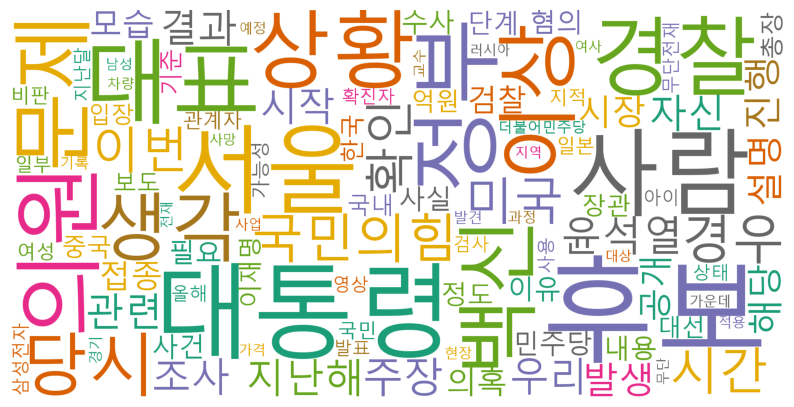

In [48]:
# 워드클라우드 생성
wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(r4)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off')
plt.imshow(wc)
plt.savefig(foldert + '/result1.png')

---

---